## Receptor-ligand interactions in human primary cells

Ramilowski et al (10.1038/ncomms8866) have a very nice resource on receptor-ligand interactions in human primary cells.
Let's explore...

In [2]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("white")
plt.rcParams['svg.fonttype'] = 'none'

Populating the interactive namespace from numpy and matplotlib


In [11]:
# Read in the supplementary material
df = pd.read_excel(
    "https://images.nature.com/original/nature-assets/ncomms/2015/150722/ncomms8866/extref/ncomms8866-s3.xlsx", 1)
df.head()

,Pair.Name,Ligand.ApprovedSymbol,Ligand.Name,Receptor.ApprovedSymbol,Receptor.Name,DLRP,HPMR,IUPHAR,HPRD,STRING.binding,STRING.experiment,HPMR.Ligand,HPMR.Receptor,PMID.Manual,Pair.Source,Pair.Evidence
0,A2M_LRP1,A2M,alpha-2-macroglobulin,LRP1,low density lipoprotein receptor-related prote...,NaN,HPMR,NaN,HPRD,STRING.binding,STRING.experiment,A2M,LRP1,NaN,known,literature supported
1,AANAT_MTNR1A,AANAT,aralkylamine N-acetyltransferase,MTNR1A,melatonin receptor 1A,NaN,HPMR,NaN,NaN,NaN,NaN,AANAT,MTNR1A,NaN,known,literature supported
2,AANAT_MTNR1B,AANAT,aralkylamine N-acetyltransferase,MTNR1B,melatonin receptor 1B,NaN,HPMR,NaN,NaN,NaN,NaN,AANAT,MTNR1B,NaN,known,literature supported
3,ACE_AGTR2,ACE,angiotensin I converting enzyme,AGTR2,"angiotensin II receptor, type 2",NaN,NaN,NaN,HPRD,NaN,NaN,ACE,AGTR2,NaN,novel,literature supported
4,ACE_BDKRB2,ACE,angiotensin I converting enzyme,BDKRB2,bradykinin receptor B2,NaN,NaN,NaN,HPRD,NaN,NaN,ACE,BDKRB2,NaN,novel,literature supported


In [12]:
# Let's explore the existing known interactions

# filter out interactions labeled as "EXCLUDED"
df = df.loc[
    ~df['Pair.Evidence'].str.contains("EXCLUDED"),
    ['Pair.Name', 'Ligand.ApprovedSymbol', 'Receptor.ApprovedSymbol']]
df.columns = ['pair', 'ligand', 'receptor']
df['interaction'] = 1

/home/afr/.local/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


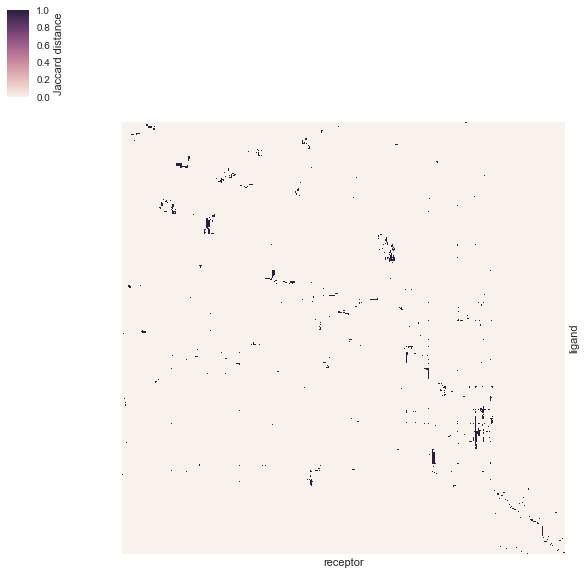

In [13]:
# Let's make a pivot table of receptor vs ligands
df_pivot = pd.pivot_table(data=df, index="ligand", columns='receptor', aggfunc=sum, fill_value=0)

# Heatmap
g = sns.clustermap(
    df_pivot, xticklabels=False, yticklabels=False, metric="jaccard",
    rasterized=True, cbar_kws={"label": "Jaccard distance"})
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_heatmap.set_xlabel("receptor")
g.savefig(os.path.join("human_receptor_ligand.interaction_map.clustermap.svg"), bbox_inches="tight", dpi=300)

In [14]:
# Let's now play with the expression of these genes in tissues
df = pd.read_excel(
    "https://images.nature.com/original/nature-assets/ncomms/2015/150722/ncomms8866/extref/ncomms8866-s5.xlsx",
    1, index_col=[0, 1, 2])
df.head()

# remove not expressed genes in any tissue
df = df[~(df.sum(1) == 0)]

/home/afr/.local/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


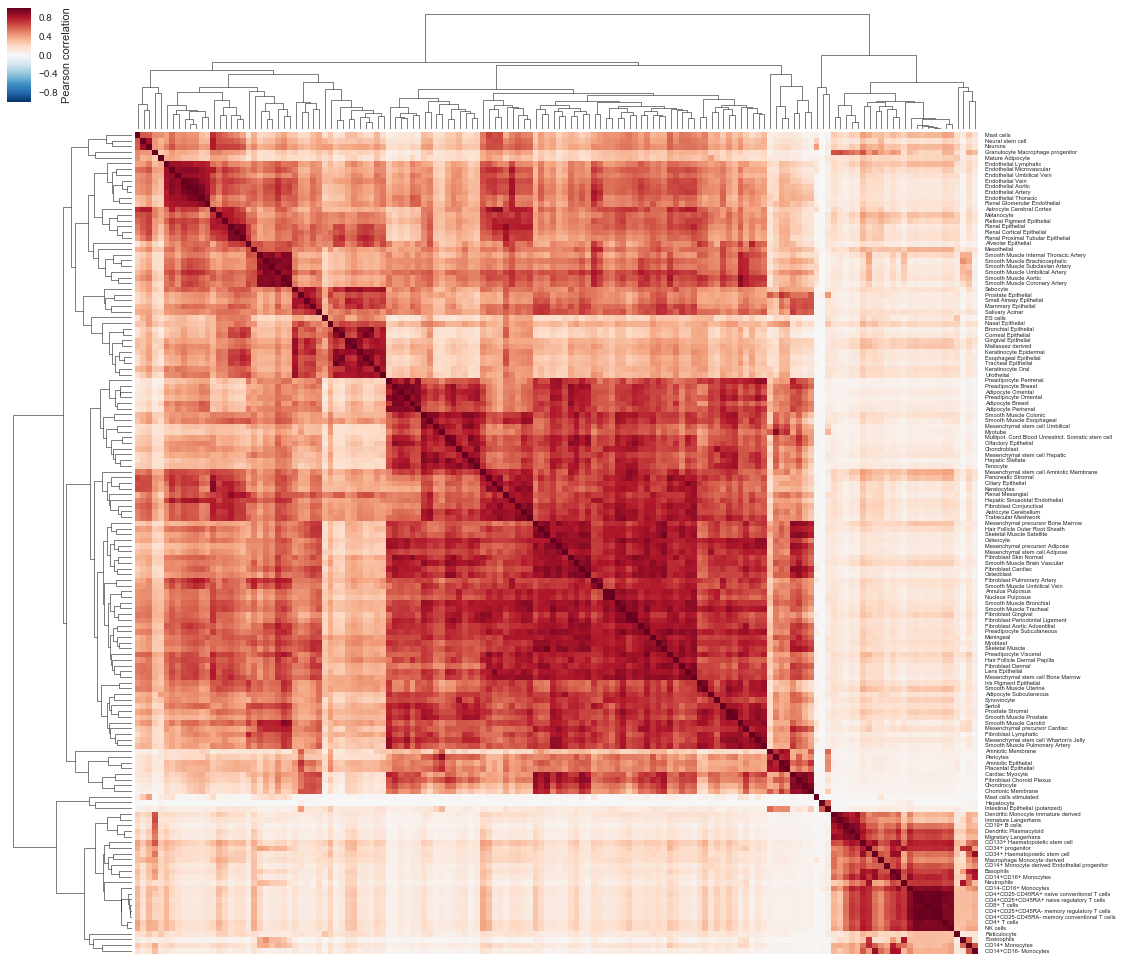

In [7]:
# Let's correlate tissues in the expression of these genes
w, h = df.shape[1] * 0.12, df.shape[1] * 0.12
g = sns.clustermap(
    df.corr(), xticklabels=False, figsize=(w, h), cbar_kws={"label": "Pearson correlation"})
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize="xx-small", rasterized=True)
g.ax_row_dendrogram.set_rasterized(True)
g.ax_col_dendrogram.set_rasterized(True)
g.savefig(
    os.path.join("human_receptor_ligand.expression.tissue_correlation.clustermap.svg"),
    bbox_inches="tight", dpi=300)

/home/afr/.local/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


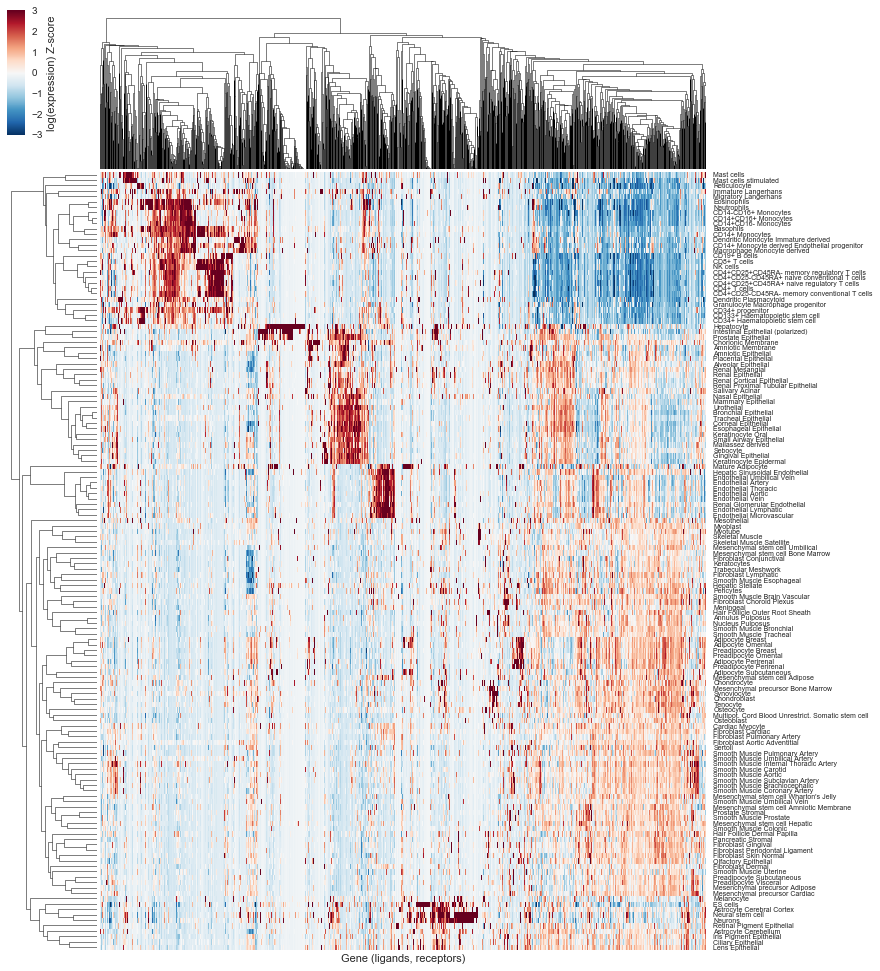

In [15]:
# Let's visualize the expression ligand and receptors in the different tissues
df2 = np.log2(1 + df.drop("F5.PrimaryCells.Expression_Max", axis=1).dropna())

w, h = df2.shape[1] * 0.12, df2.shape[0] * 0.01
g = sns.clustermap(df2.T, metric="correlation", z_score=1, vmin=-3, vmax=3,
                   figsize=(h, w), cbar_kws={"label": "log(expression) Z-score"}, xticklabels=False, rasterized=True)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize="x-small")
g.ax_row_dendrogram.set_rasterized(True)
g.ax_col_dendrogram.set_rasterized(True)
g.ax_heatmap.set_xlabel("Gene (ligands, receptors)")
g.savefig(os.path.join("human_receptor_ligand.expression.clustermap.svg"), bbox_inches="tight", dpi=300)